# Dalhquist's ODE using sequential timestepping

We will solve Dalhquist's model linear ODE using serial timestepping and the implicit theta method.

Dalhquist's test equation is a very simple linear ODE, and is useful for testing and demonstrating time integration methods:

$$
\partial_{t}q(t) = f(q,t) = \lambda q(t) + b(t)
$$

The solutions to the homogeneous equation $(b=0)$ are exponentials with the form:

$$
q(t) = q(0)e^{\lambda t}
$$

In general $\lambda=a+ib$ can be complex, which leads to oscillitory solutions with frequency $b$ and a decay rate $a$. For the solution to remain bounded for $t\geq0$ we require $a\leq0$ so that the solution decays.

## Time discretisation

The implicit theta method is a single-step method which includes the first order forward and backward Euler methods, and the second order trapezium rule method as special cases.

The solution $q$ is discretised in time, with the discrete solution $q^{n}$ approximating $q(t^{n})$, where $t^{n}=n\Delta t$ and $\Delta t$ is the timestep size. The implicit theta method provides an update from the current timestep $q^{n}$ to the next timestep $q^{n+1}$ by:

$$
\frac{q^{n+1}-q^{n}}{\Delta t} = \theta f(q^{n+1}, t^{n+1}) + (1-\theta)f(q^{n}, t^{n})
$$

The time derivative is approximated using simple finite differences, and the right hand side is approximated by a weighted sum of the values at the current and next timestep. When $\theta=0$ we have the explicit forward Euler method, when $\theta=1$ we have the implicit backward Euler method, and when $\theta=0.5$ we have the trapezium rule.

## Implementing the discretisation

Now that we have a timestepping method, we can begin implementing it to find a time series of the solution.
First we define the simulation time `T`, the number of timesteps `nt`, the timestep size `dt`, the theta method parameter `theta`, the initial condition `q0`, and the eigenvalue `lamda`. We choose a $\lambda$ with a small real part so it decays only very gradually. This means that we can solve for longer times without the solution decaying to zero.

In [7]:
T = 102.4
nt = 1024
dt = T/nt
theta = 0.5
lamda = -0.01 + 1.0j
q0 = 1

Next we set up the array to store the timeseries and set the initial condition.

In [8]:
import numpy as np

q = np.zeros(nt+1, dtype=complex)
q[0] = q0

We will add some forcing to the system in the form of gaussian profiles centred at various timepoints. The exact values don't matter, it will just make the solution a little more interesting.

In [13]:
def b(t):
    bb = 0
    bb += 2*np.exp(-(t-9.5)*(t-9.5))
    bb += 0.5*np.exp(-(t-21.3)*(t-21.3)/4)
    bb += -5*np.exp(-(t-48.7)*(t-48.7)/9)
    return bb

Next is the timestepping loop. At each iteration `i` we need to calculate the next timestep `q[i+1]` using the current timestep `q[i]` and the forcing `b`:

In [17]:
for i in range(nt):
    # implement the timestepping iteration here
    tn = i*dt
    tn1 = (i+1)*dt
    
    bb = (1-theta)*b(tn) + theta*b(tn1)

    rhs = (1 + dt*(1-theta)*lamda)*q[i] + dt*bb
    lhs = (1 - dt*theta*lamda)
    
    q[i+1] = rhs/lhs

Now we can visualise the evolution of $q$ over time.

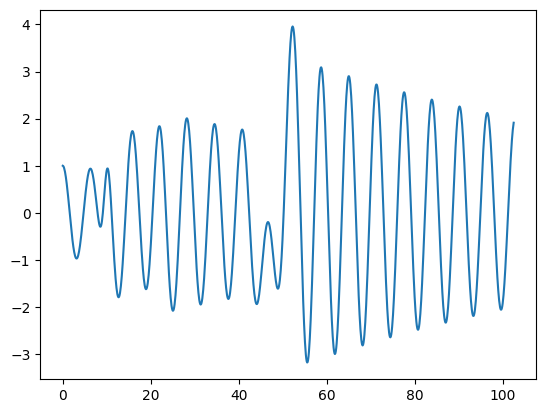

In [15]:
import matplotlib.pyplot as plt

time = np.linspace(0, nt*dt, num=nt+1, endpoint=True)

plt.plot(time, q.real)
plt.show()